# In this notebook we will run different Machine Learning Models with the intial preprocessed dataset and the augmented datasets.

In [1]:
#!pip install wordcloud
#!pip install langdetect
#!pip install googletrans
#!pip install textblob
#!pip install spacy
#!python -m spacy download en
#!python -m spacy download en_core_web_sm
#!python -m spacy download en_core_web_md
#!python -m spacy download en_core_web_lg
#!pip install langid
#!pip install google_trans_new
#!pip uninstall googletrans
#!pip install gensim
#!pip install keras
#!pip install xgboost
#!pip install nltk

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#from nltk.stem import WordNetLemmatizer
#from wordcloud import WordCloud, STOPWORDS 
#from langdetect import detect
from itertools import cycle
#import googletrans
#from googletrans import Translator
#from google_trans_new import google_translator 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
#from textblob import TextBlob
#from textblob.translate import NotTranslated
import random
import operator
import math
import tqdm
import time
#import spacy
import json
import tensorflow as tf
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
#import langid 

In [3]:
dfObj = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'f1', 'Precision Score', 'Recall Score'])
#Panda option settings that will be applicable through out this notebook
pd.set_option('max_colwidth', 80)

# Some useful functions
# given a dataframe and a sort sequence, return back the sorted dataframe
def sort_df(df, arr):
    df.sort_values(by=arr, inplace=True, ascending=False)
    df = df.reset_index()
    df = df.drop('index', 1)
    df.index += 1
    return df

# given a sequence of attributes and a dataframe, return dataframe sorted by descending order of importance
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}).sort_values('feature_importance',
                        ascending = False).reset_index(drop = True)
    return df

def print_classification_report(X_test,y_test):
    print('Classification report:\n %s' % (classification_report(y_test, y_pred)))

    
def print_confusion_matrix(y_test,y_pred):
    cm = metrics.confusion_matrix(y_test, y_pred)  
    cm_df = pd.DataFrame(cm)
    plt.figure(figsize=(20,10))  
    sns.heatmap(cm_df, annot=True)

### This section below contains  Useful Functions 
- As we find new functions, we will create them here.

### In this notebook we will show all ML Models with results using dataset after augmentation round 2

In [4]:
mydata = pd.read_csv('datasets/input_data_after_preprocessing_for_ml.csv')
augmented_df = pd.read_csv('datasets/input_data_after_data_for_ml__with_augmentation_knn_round2.csv')
#mydata = pd.read_excel("datasets/input_data.xlsx")
#mydata = pd.read_pickle('datasets/preprocesseddata_mldl.pkl')

In [5]:
df2 = augmented_df
le = preprocessing.LabelEncoder()
df2["LabelEncodings"] = le.fit_transform(augmented_df["Assignment group"])
y_classes_len = len(le.classes_)
le.classes_
print(y_classes_len)

74


In [6]:
y = np.asarray(df2['LabelEncodings'])

In [7]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(augmented_df['Combined Description Cleaned'])
print(X_train_counts.shape)

(31133, 4483)


In [8]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)

(31133, 4483)


In [9]:
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y, test_size=test_size)

In [10]:
print(len(count_vect.vocabulary_))

4483


In [11]:
print(X_train.shape)
print(y_train.shape)

(21793, 4483)
(21793,)


In [12]:
print(X_test.shape)
print(y_test.shape)

(9340, 4483)
(9340,)


In [13]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial').fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [14]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.73      0.62       941
           1       1.00      0.50      0.67        88
           2       0.89      0.83      0.86       168
           3       1.00      0.75      0.86        57
           4       0.75      0.86      0.80       552
           5       0.84      0.89      0.86       331
           6       0.83      0.81      0.82       282
           7       0.99      0.76      0.86        90
           8       0.87      0.91      0.89       203
           9       0.92      0.89      0.91        94
          10       0.91      0.88      0.89       189
          11       0.75      0.74      0.74       476
          12       0.74      0.88      0.80       556
          13       0.92      0.57      0.71        80
          14       0.93      0.86      0.89        59
          15       1.00      0.62      0.76        73
          16       0.90      0.92      0.91        59
          17       0.74    

/home/sridhar/anaconda3/envs/tfnightly_py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


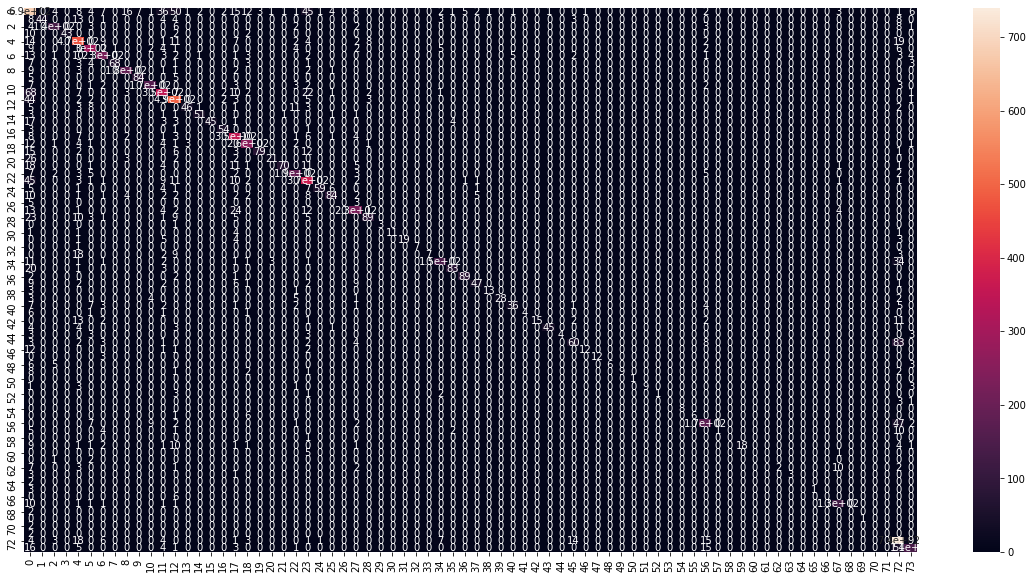

In [15]:
print_confusion_matrix(y_test,y_pred)

In [16]:
acc_score = accuracy_score(y_test, y_pred)
print("Logistic Regression Score: ", acc_score)
f1_score = metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
print("Logistic Regression F1 Score: ", f1_score)
precision_score = metrics.precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
recall_score = metrics.recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
print('f1 score: {:.2%}'.format(f1_score))
print('Precison Score : {:.2%}'.format(precision_score))
print('Recall score: {:.2%}'.format(recall_score))
#dfObj = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'f1', 'Precision Score', 'Recall Score'])
accuracy = accuracy_score(y_test, y_pred)
dfObj = dfObj.append({'Algorithm' : 'LR   {:.0%}'.format(test_size) + ' Test Data after Data Augmentation Word Embedding Round 2' ,
                      'Accuracy': '{:.2%}'.format(accuracy),
                      'f1':'{:.2%}'.format(f1_score),
                      'Precision Score': '{:.2%}'.format(precision_score),
                      'Recall Score': '{:.2%}'.format(recall_score) 
                     } , ignore_index=True)

sort_by=['Accuracy', 'f1']
dfObj = sort_df(dfObj,sort_by)
dfObj

Logistic Regression Score:  0.7647751605995717
Logistic Regression F1 Score:  0.7610107021076028
f1 score: 76.10%
Precison Score : 78.98%
Recall score: 76.77%


,Algorithm,Accuracy,f1,Precision Score,Recall Score
1,LR 30% Test Data after Data Augmentation Word Embedding Round 2,76.48%,76.10%,78.98%,76.77%


In [17]:
#param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid'],
#              'random_state': [1], 'probability': [True,False]}
#grid = GridSearchCV(SVC(),param_grid,refit=True,n_jobs=16,verbose=1)
#grid.fit(X_train,y_train)
#print(f'The best estimator is: \n {grid.best_estimator_}\n\n')
#grid_predictions = grid.predict(X_test)
#Fitting 5 folds for each of 96 candidates, totalling 480 fits
#C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
#  warnings.warn(("The least populated class in y has only %d"
#[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
#[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   47.1s
#[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:  3.2min
#[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:  9.4min
#[Parallel(n_jobs=16)]: Done 480 out of 480 | elapsed: 10.3min finished
#The best estimator is: 
# SVC(C=10, gamma=1, probability=False, random_state=1)

In [18]:
svc = SVC(C=10, gamma=1, probability=False, random_state=1)
clf = svc.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [20]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       941
           1       0.92      0.76      0.83        88
           2       0.98      0.93      0.96       168
           3       1.00      0.96      0.98        57
           4       0.92      0.92      0.92       552
           5       0.98      0.97      0.98       331
           6       0.96      0.93      0.95       282
           7       1.00      0.98      0.99        90
           8       0.98      0.99      0.98       203
           9       0.98      1.00      0.99        94
          10       1.00      0.97      0.98       189
          11       0.96      0.94      0.95       476
          12       0.95      0.96      0.96       556
          13       0.99      1.00      0.99        80
          14       0.98      0.97      0.97        59
          15       1.00      1.00      1.00        73
          16       0.97      0.98      0.97        59
          17       0.90    

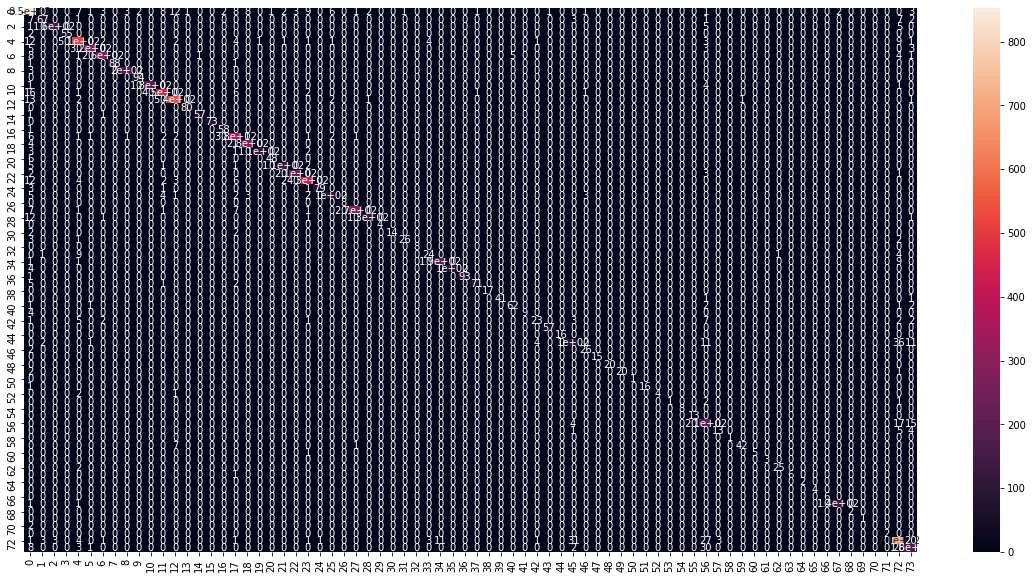

In [21]:
print_confusion_matrix(y_test,y_pred)

In [22]:
f1_score_svc = metrics.f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
precision_score_svc = metrics.precision_score(y_test, y_pred, average="macro")
recall_score_svc = metrics.recall_score(y_test, y_pred, average="macro")
print('f1 score: {:.2%}'.format(f1_score_svc))
print('Precison Score : {:.2%}'.format(precision_score_svc))
print('Recall score: {:.2%}'.format(recall_score_svc))
#dfObj = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'f1', 'Precision Score', 'Recall Score'])
accuracy = metrics.accuracy_score(y_test, y_pred)
dfObj = dfObj.append({'Algorithm' : 'SVC   {:.0%}'.format(test_size) + ' Test Data after Data Augmentation Word Embedding Round 2' ,
                      'Accuracy': '{:.2%}'.format(accuracy),
                      'f1':'{:.2%}'.format(f1_score_svc),
                      'Precision Score': '{:.2%}'.format(precision_score_svc),
                      'Recall Score': '{:.2%}'.format(recall_score_svc) 
                     } , ignore_index=True)

sort_by=['Accuracy', 'f1']
dfObj = sort_df(dfObj,sort_by)
dfObj

f1 score: 91.44%
Precison Score : 94.37%
Recall score: 89.24%


/home/sridhar/anaconda3/envs/tfnightly_py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Algorithm,Accuracy,f1,Precision Score,Recall Score
1,SVC 30% Test Data after Data Augmentation Word Embedding Round 2,91.43%,91.44%,94.37%,89.24%
2,LR 30% Test Data after Data Augmentation Word Embedding Round 2,76.48%,76.10%,78.98%,76.77%


## Observation
SVC is able to score much higher score compared to LR. 

In [23]:
augmented_df.to_csv('datasets/input_data_after_data_for_dl__with_augmentation_knn_round2.csv') 

# KNN Model 
#### Build KNN algorithm 
- KNN or K - Nearest Neighbors is an alogrithm that can apply to classification problems like this one . It also works for Linear regression problems . 
- Advantages - the algorithm is simple and easy to implement.

- Disadvantages - The algorithm gets significantly slower as the number of independent variables increase.

In [24]:
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [25]:
from sklearn.neighbors import KNeighborsClassifier
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_predict_knn = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_predict_knn)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


In [26]:
# instantiate learning model (k = optimal_k)
knn = KNeighborsClassifier(n_neighbors=optimal_k)
# fitting the model
knn.fit(X_train, y_train)
# predict the response
y_predict_knn = knn.predict(X_test)

In [27]:
print(metrics.classification_report(y_test,y_predict_knn))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78       941
           1       0.67      0.74      0.70        88
           2       0.88      0.92      0.90       168
           3       0.98      1.00      0.99        57
           4       0.89      0.90      0.89       552
           5       0.97      0.97      0.97       331
           6       0.94      0.95      0.94       282
           7       0.97      0.98      0.97        90
           8       0.98      0.99      0.98       203
           9       0.93      0.99      0.96        94
          10       0.96      0.97      0.96       189
          11       0.89      0.92      0.91       476
          12       0.95      0.95      0.95       556
          13       0.99      1.00      0.99        80
          14       0.95      0.98      0.97        59
          15       0.95      1.00      0.97        73
          16       0.97      0.98      0.97        59
          17       0.84    

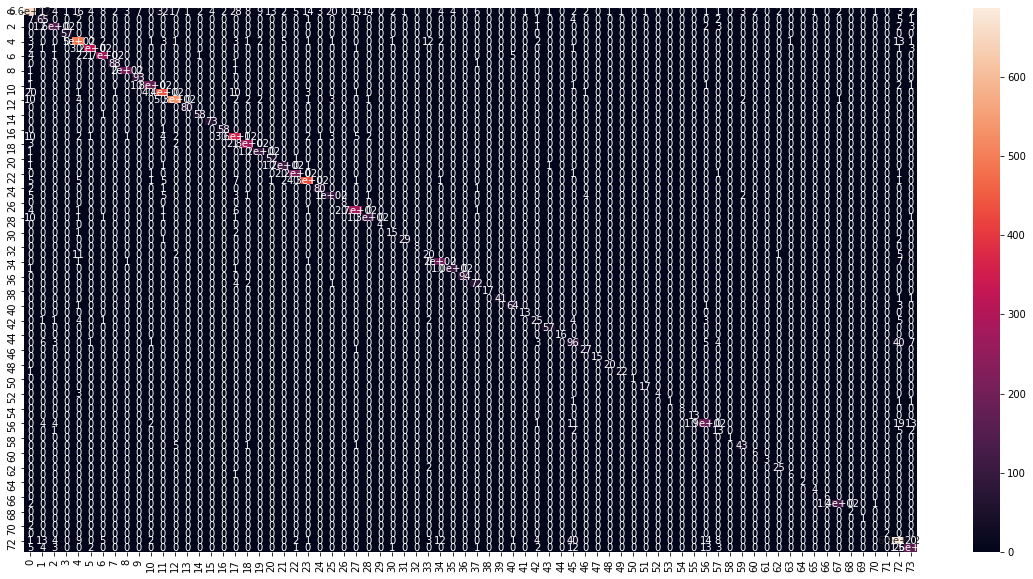

In [28]:
print_confusion_matrix(y_test,y_predict_knn)

In [29]:
f1_score_knn = metrics.f1_score(y_test, y_predict_knn, average='weighted', labels=np.unique(y_predict_knn))
precision_score_knn = metrics.precision_score(y_test, y_predict_knn, average="macro")
recall_score_knn = metrics.recall_score(y_test, y_predict_knn, average="macro")
print('f1 score: {:.2%}'.format(f1_score_knn))
print('Precison Score : {:.2%}'.format(precision_score_knn))
print('Recall score: {:.2%}'.format(recall_score_knn))
#dfObj = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'f1', 'Precision Score', 'Recall Score'])
accuracy = metrics.accuracy_score(y_test, y_predict_knn)
dfObj = dfObj.append({'Algorithm' : 'KNN   {:.0%}'.format(test_size) + ' Test Data after Data Augmentation Word Embedding Round 2' ,
                      'Accuracy': '{:.2%}'.format(accuracy),
                      'f1':'{:.2%}'.format(f1_score_knn),
                      'Precision Score': '{:.2%}'.format(precision_score_knn),
                      'Recall Score': '{:.2%}'.format(recall_score_knn) 
                     } , ignore_index=True)

sort_by=['Accuracy', 'f1']
dfObj = sort_df(dfObj,sort_by)
dfObj

f1 score: 88.70%
Precison Score : 89.36%
Recall score: 90.07%


,Algorithm,Accuracy,f1,Precision Score,Recall Score
1,SVC 30% Test Data after Data Augmentation Word Embedding Round 2,91.43%,91.44%,94.37%,89.24%
2,KNN 30% Test Data after Data Augmentation Word Embedding Round 2,88.81%,88.70%,89.36%,90.07%
3,LR 30% Test Data after Data Augmentation Word Embedding Round 2,76.48%,76.10%,78.98%,76.77%


# Observation
- KNN is also able to score more than 90% accuracy

# Build the ensemble models 

### Build Decision Tree Model
#### We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. Other option includes 'entropy'.  
##### Gini: measures how often a randomly chosen element from the set would be incorrectly labeled.
##### Entropy: It is used to measure the impurity or randomness of a dataset

In [30]:
from sklearn.tree import DecisionTreeClassifier
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
model_dTree = dTree.fit(X_train, y_train)
y_predict_dt = dTree.predict(X_test)

In [31]:
print(metrics.classification_report(y_test,y_predict_dt))

              precision    recall  f1-score   support

           0       0.61      0.60      0.61       941
           1       0.72      0.72      0.72        88
           2       0.73      0.82      0.77       168
           3       0.81      0.91      0.86        57
           4       0.82      0.83      0.83       552
           5       0.88      0.84      0.86       331
           6       0.84      0.80      0.82       282
           7       0.90      0.84      0.87        90
           8       0.85      0.88      0.86       203
           9       0.98      0.90      0.94        94
          10       0.90      0.81      0.85       189
          11       0.77      0.77      0.77       476
          12       0.84      0.89      0.86       556
          13       0.87      0.91      0.89        80
          14       0.88      0.88      0.88        59
          15       0.90      0.84      0.87        73
          16       0.90      0.97      0.93        59
          17       0.78    

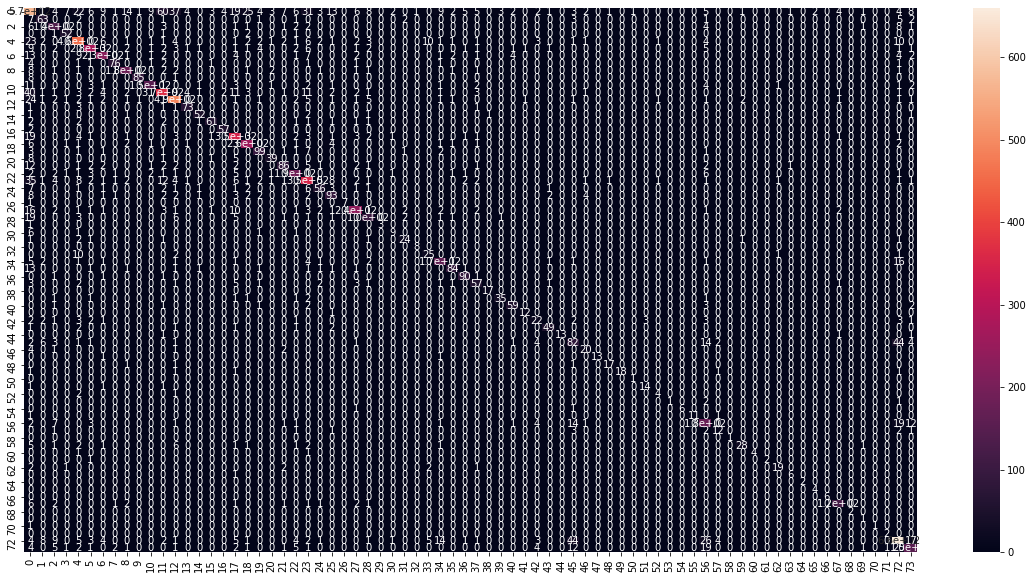

In [32]:
print_confusion_matrix(y_test,y_predict_dt)

In [33]:
f1_score_dt = metrics.f1_score(y_test, y_predict_dt, average='weighted', labels=np.unique(y_predict_dt))
precision_score_dt = metrics.precision_score(y_test, y_predict_dt, average="macro")
recall_score_dt = metrics.recall_score(y_test, y_predict_dt, average="macro")
print('f1 score: {:.2%}'.format(f1_score_dt))
print('Precison Score : {:.2%}'.format(precision_score_dt))
print('Recall score: {:.2%}'.format(recall_score_dt))
#dfObj = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'f1', 'Precision Score', 'Recall Score'])
accuracy = metrics.accuracy_score(y_test, y_predict_dt)
dfObj = dfObj.append({'Algorithm' : 'DT   {:.0%}'.format(test_size) + ' Test Data after Data Augmentation Word Embedding Round 2' ,
                      'Accuracy': '{:.2%}'.format(accuracy),
                      'f1':'{:.2%}'.format(f1_score_dt),
                      'Precision Score': '{:.2%}'.format(precision_score_dt),
                      'Recall Score': '{:.2%}'.format(recall_score_dt) 
                     } , ignore_index=True)

sort_by=['Accuracy', 'f1']
dfObj = sort_df(dfObj,sort_by)
dfObj

f1 score: 78.35%
Precison Score : 82.03%
Recall score: 79.56%


,Algorithm,Accuracy,f1,Precision Score,Recall Score
1,SVC 30% Test Data after Data Augmentation Word Embedding Round 2,91.43%,91.44%,94.37%,89.24%
2,KNN 30% Test Data after Data Augmentation Word Embedding Round 2,88.81%,88.70%,89.36%,90.07%
3,DT 30% Test Data after Data Augmentation Word Embedding Round 2,78.37%,78.35%,82.03%,79.56%
4,LR 30% Test Data after Data Augmentation Word Embedding Round 2,76.48%,76.10%,78.98%,76.77%


# Observation
- DT is able to score better than LR but lags others

In [34]:
bgcl = BaggingClassifier(n_estimators=10, max_samples= .7, bootstrap=True)
model_bgcl = bgcl.fit(X_train, y_train)
y_predict = model_bgcl.predict(X_test)
model_bgcl.score( X_test, y_test)

0.8394004282655246

In [35]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.66      0.71      0.68       941
           1       0.86      0.70      0.78        88
           2       0.88      0.90      0.89       168
           3       0.90      0.98      0.94        57
           4       0.82      0.89      0.85       552
           5       0.92      0.91      0.91       331
           6       0.90      0.88      0.89       282
           7       0.98      0.92      0.95        90
           8       0.89      0.95      0.92       203
           9       0.99      0.93      0.96        94
          10       0.94      0.89      0.92       189
          11       0.83      0.82      0.82       476
          12       0.88      0.93      0.90       556
          13       0.94      0.97      0.96        80
          14       1.00      0.93      0.96        59
          15       0.96      0.89      0.92        73
          16       0.89      0.97      0.93        59
          17       0.78    

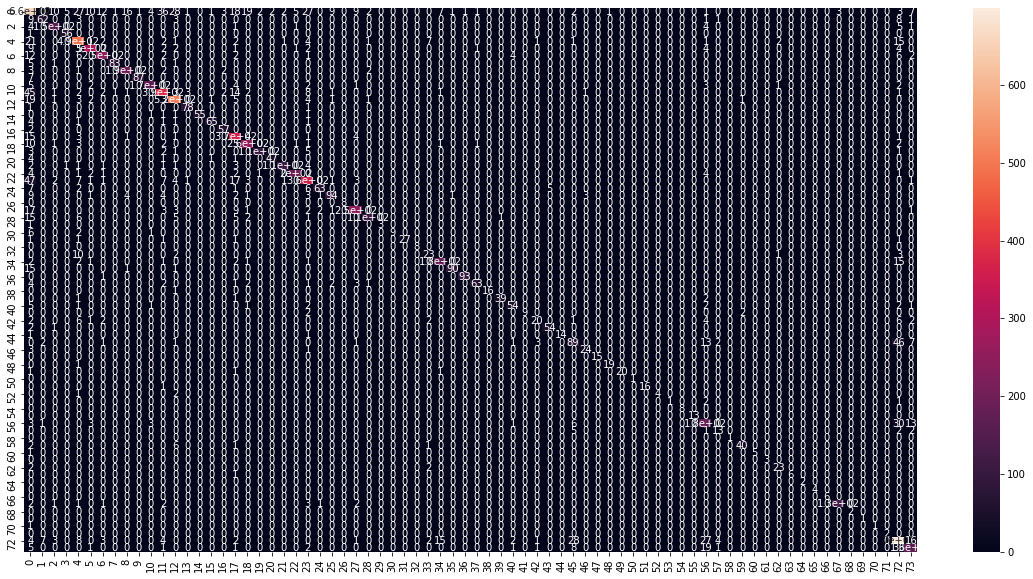

In [36]:
print_confusion_matrix(y_test,y_predict)

In [37]:
f1_score = metrics.f1_score(y_test, y_predict, average='weighted', labels=np.unique(y_predict))
precision_score = metrics.precision_score(y_test, y_predict, average="macro")
recall_score = metrics.recall_score(y_test, y_predict, average="macro")
print('f1 score: {:.2%}'.format(f1_score))
print('Precison Score : {:.2%}'.format(precision_score))
print('Recall score: {:.2%}'.format(recall_score))
#dfObj = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'f1', 'Precision Score', 'Recall Score'])
accuracy = metrics.accuracy_score(y_test, y_predict)
dfObj = dfObj.append({'Algorithm' : 'Bagging Classifier {:.0%}'.format(test_size) + ' Test Data after Data Augmentation Word Embedding Round 2' ,
                      'Accuracy': '{:.2%}'.format(accuracy),
                      'f1':'{:.2%}'.format(f1_score),
                      'Precision Score': '{:.2%}'.format(precision_score),
                      'Recall Score': '{:.2%}'.format(recall_score) 
                     } , ignore_index=True)

sort_by=['Accuracy', 'f1']
dfObj = sort_df(dfObj,sort_by)
dfObj

f1 score: 83.94%
Precison Score : 92.17%
Recall score: 84.95%


,Algorithm,Accuracy,f1,Precision Score,Recall Score
1,SVC 30% Test Data after Data Augmentation Word Embedding Round 2,91.43%,91.44%,94.37%,89.24%
2,KNN 30% Test Data after Data Augmentation Word Embedding Round 2,88.81%,88.70%,89.36%,90.07%
3,Bagging Classifier 30% Test Data after Data Augmentation Word Embedding Round 2,83.94%,83.94%,92.17%,84.95%
4,DT 30% Test Data after Data Augmentation Word Embedding Round 2,78.37%,78.35%,82.03%,79.56%
5,LR 30% Test Data after Data Augmentation Word Embedding Round 2,76.48%,76.10%,78.98%,76.77%


# Observation
- Bagging Classifier is able to score better than DT but lags SVC & KNN

# Apply XGBoost Classifier Algorithm with Hyper Parameters 
### Some Parameters used:
-  min_child_weight : Minimum sum of instance weight (hessian) needed in a child.
- gamma: Minimum loss reduction required to make a further partition on a leaf node of the tree. The larger gamma is, the more conservative the algorithm will be.
- subsample: Subsample ratio of the training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting.
- colsample_bytree: is the subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.


In [38]:
xgb1 = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
# A parameter grid for XGBoost
parameters = {
        'min_child_weight': [1],
        'gamma': [0.5, 1],
        'subsample': [0.8],
        'colsample_bytree': [0.6, 0.8],
        'n_estimators': range(60, 220, 40),
        'learning_rate': [0.1],
        'objective':['multi:softprob'],
        'max_depth': [3, 4, 5]
        }

#parameters = {
#    'max_depth': range (2, 10, 1),
#    'n_estimators': range(60, 220, 40),
#    'learning_rate': [0.1, 0.01, 0.05]
#}
#xgb1 = GridSearchCV(
#    estimator=estimator,
#    param_grid=parameters,
#    scoring=f1.macro,
#    n_jobs = 16,
#    cv = 10,
#    verbose=10
#)
#print(f'The best estimator is: \n {xgb1.best_estimator_}\n\n')
model_xgb1 = xgb1.fit(X_train, y_train)
y_predict = model_xgb1.predict(X_test)

/home/sridhar/anaconda3/envs/tfnightly_py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:48:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [39]:
print(metrics.classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69       941
           1       0.89      0.65      0.75        88
           2       0.94      0.89      0.91       168
           3       1.00      0.82      0.90        57
           4       0.83      0.85      0.84       552
           5       0.94      0.93      0.94       331
           6       0.91      0.86      0.88       282
           7       1.00      0.92      0.96        90
           8       0.90      0.97      0.93       203
           9       0.99      0.97      0.98        94
          10       0.97      0.92      0.94       189
          11       0.82      0.85      0.83       476
          12       0.88      0.89      0.88       556
          13       1.00      0.89      0.94        80
          14       0.95      0.93      0.94        59
          15       1.00      0.86      0.93        73
          16       0.92      0.97      0.94        59
          17       0.75    

/home/sridhar/anaconda3/envs/tfnightly_py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


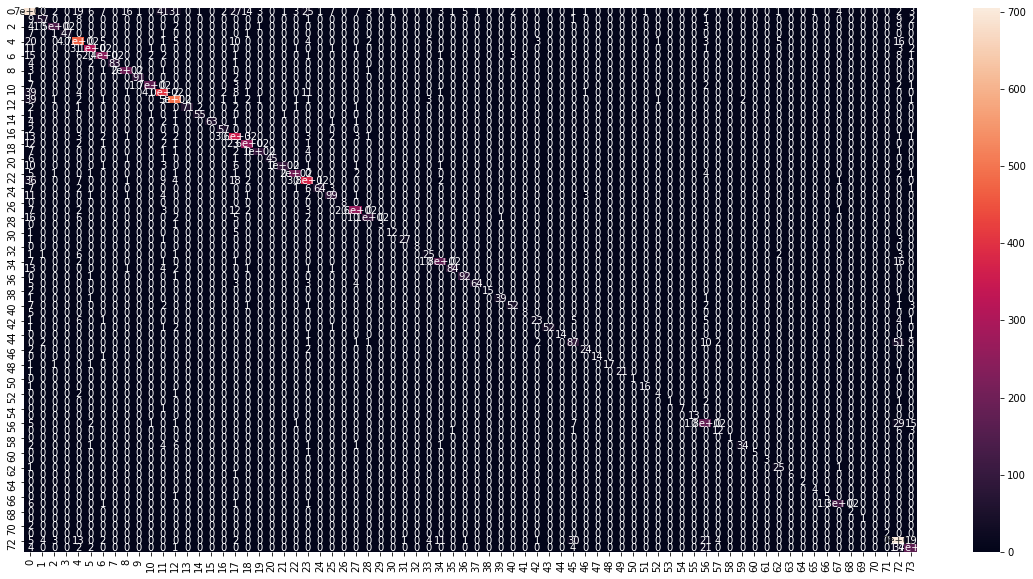

In [40]:
print_confusion_matrix(y_test,y_predict)

In [41]:
f1_score = metrics.f1_score(y_test, y_predict, average='weighted', labels=np.unique(y_predict))
precision_score = metrics.precision_score(y_test, y_predict, average="macro")
recall_score = metrics.recall_score(y_test, y_predict, average="macro")
print('f1 score: {:.2%}'.format(f1_score))
print('Precison Score : {:.2%}'.format(precision_score))
print('Recall score: {:.2%}'.format(recall_score))
#dfObj = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'f1', 'Precision Score', 'Recall Score'])
accuracy = metrics.accuracy_score(y_test, y_predict)
dfObj = dfObj.append({'Algorithm' : 'XGBoost Classifier {:.0%}'.format(test_size) + ' Test Data after Data Augmentation Word Embedding Round 2' ,
                      'Accuracy': '{:.2%}'.format(accuracy),
                      'f1':'{:.2%}'.format(f1_score),
                      'Precision Score': '{:.2%}'.format(precision_score),
                      'Recall Score': '{:.2%}'.format(recall_score) 
                     } , ignore_index=True)

sort_by=['Accuracy', 'f1']
dfObj = sort_df(dfObj,sort_by)
dfObj

f1 score: 84.16%
Precison Score : 90.65%
Recall score: 83.31%


/home/sridhar/anaconda3/envs/tfnightly_py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Algorithm,Accuracy,f1,Precision Score,Recall Score
1,SVC 30% Test Data after Data Augmentation Word Embedding Round 2,91.43%,91.44%,94.37%,89.24%
2,KNN 30% Test Data after Data Augmentation Word Embedding Round 2,88.81%,88.70%,89.36%,90.07%
3,XGBoost Classifier 30% Test Data after Data Augmentation Word Embedding Round 2,84.06%,84.16%,90.65%,83.31%
4,Bagging Classifier 30% Test Data after Data Augmentation Word Embedding Round 2,83.94%,83.94%,92.17%,84.95%
5,DT 30% Test Data after Data Augmentation Word Embedding Round 2,78.37%,78.35%,82.03%,79.56%
6,LR 30% Test Data after Data Augmentation Word Embedding Round 2,76.48%,76.10%,78.98%,76.77%


# Observation
- XGB & Bagging Classifier both have high precision score but lagging in Accuracy and f1

In [43]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
# Create Learners per layer
layer_one_estimators = [
                 ('SVC', svc),
                 ('LR', clf),
                 ('DT', model_dTree)             
                ]

layer_two_estimators = [
                        ('LR', clf),
                        ('BAG', model_bgcl),
                        ('xgb', model_xgb1)     
                       ]

layer_two = StackingClassifier(estimators=layer_two_estimators, final_estimator=model_xgb1, n_jobs=-1)

# Create Final model by 
clf = StackingClassifier(estimators=layer_one_estimators, final_estimator=layer_two, n_jobs=-1)
clf.fit(X_train, y_train).score(X_test, y_test)

model_stacker2 = clf.fit(X_train, y_train)
model_stacker2.score( X_test, y_test)
y_predict_stacker2 = model_stacker2.predict(X_test)

/home/sridhar/anaconda3/envs/tfnightly_py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:14:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/sridhar/anaconda3/envs/tfnightly_py38/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:38:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [44]:
print(metrics.classification_report(y_test,y_predict_stacker2))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       941
           1       0.91      0.70      0.79        88
           2       0.95      0.94      0.95       168
           3       0.98      0.96      0.97        57
           4       0.90      0.91      0.91       552
           5       0.94      0.97      0.95       331
           6       0.97      0.89      0.93       282
           7       0.99      0.98      0.98        90
           8       0.98      0.99      0.99       203
           9       0.98      0.95      0.96        94
          10       1.00      0.97      0.98       189
          11       0.94      0.94      0.94       476
          12       0.93      0.94      0.94       556
          13       0.99      1.00      0.99        80
          14       0.98      0.97      0.97        59
          15       1.00      1.00      1.00        73
          16       0.95      0.98      0.97        59
          17       0.91    

/home/sridhar/anaconda3/envs/tfnightly_py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


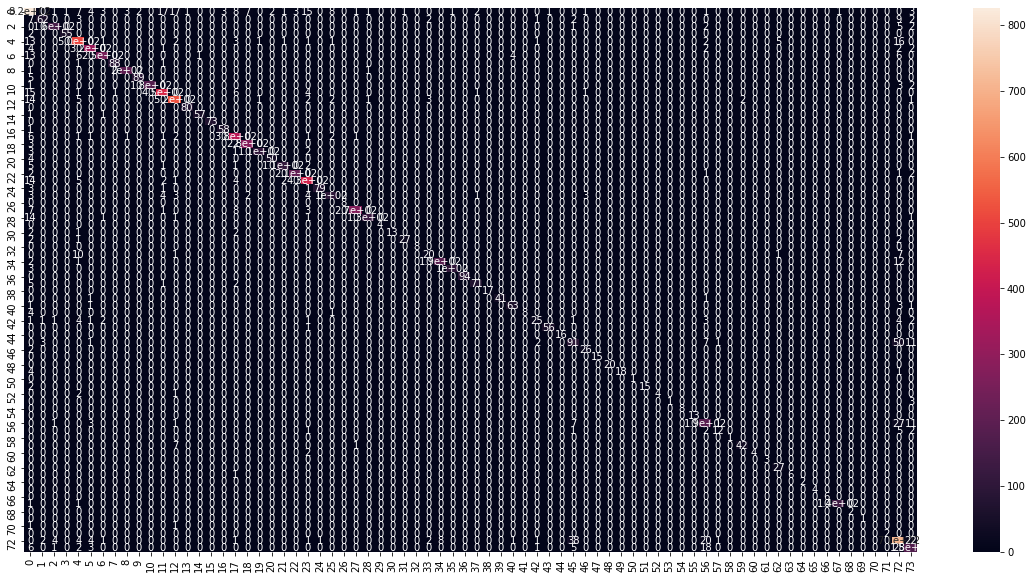

In [45]:
print_confusion_matrix(y_test,y_predict_stacker2)

In [46]:
f1_score = metrics.f1_score(y_test, y_predict_stacker2, average='weighted', labels=np.unique(y_predict_stacker2))
precision_score = metrics.precision_score(y_test, y_predict_stacker2, average="macro")
recall_score = metrics.recall_score(y_test, y_predict_stacker2, average="macro")
print('f1 score: {:.2%}'.format(f1_score))
print('Precison Score : {:.2%}'.format(precision_score))
print('Recall score: {:.2%}'.format(recall_score))
#dfObj = pd.DataFrame(columns=['Algorithm', 'Accuracy', 'f1', 'Precision Score', 'Recall Score'])
accuracy = metrics.accuracy_score(y_test, y_predict_stacker2)
dfObj = dfObj.append({'Algorithm' : 'Stacker {:.0%}'.format(test_size) + ' Test Data after Data Augmentation Word Embedding Round 2' ,
                      'Accuracy': '{:.2%}'.format(accuracy),
                      'f1':'{:.2%}'.format(f1_score),
                      'Precision Score': '{:.2%}'.format(precision_score),
                      'Recall Score': '{:.2%}'.format(recall_score) 
                     } , ignore_index=True)

sort_by=['Accuracy', 'f1']
dfObj = sort_df(dfObj,sort_by)
dfObj

f1 score: 90.46%
Precison Score : 93.74%
Recall score: 88.29%


/home/sridhar/anaconda3/envs/tfnightly_py38/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Algorithm,Accuracy,f1,Precision Score,Recall Score
1,SVC 30% Test Data after Data Augmentation Word Embedding Round 2,91.43%,91.44%,94.37%,89.24%
2,Stacker 30% Test Data after Data Augmentation Word Embedding Round 2,90.50%,90.46%,93.74%,88.29%
3,KNN 30% Test Data after Data Augmentation Word Embedding Round 2,88.81%,88.70%,89.36%,90.07%
4,XGBoost Classifier 30% Test Data after Data Augmentation Word Embedding Round 2,84.06%,84.16%,90.65%,83.31%
5,Bagging Classifier 30% Test Data after Data Augmentation Word Embedding Round 2,83.94%,83.94%,92.17%,84.95%
6,DT 30% Test Data after Data Augmentation Word Embedding Round 2,78.37%,78.35%,82.03%,79.56%
7,LR 30% Test Data after Data Augmentation Word Embedding Round 2,76.48%,76.10%,78.98%,76.77%


# Observation
- Stacker results are pretty impressive 
- Overall SVC, Stacker are the best performers

LR: nan (nan)
SVC: 0.827516 (0.011801)
KNN: 0.807816 (0.010580)
DT: 0.664668 (0.013337)
BAG: 0.724090 (0.012301)
XGB: 0.733405 (0.012440)


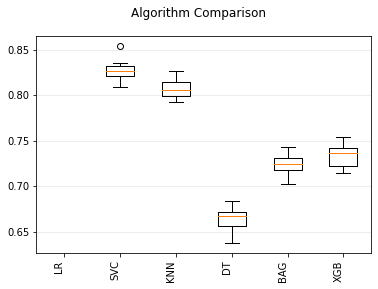

In [48]:
models = []
models.append(('LR', clf))
models.append(('SVC', svc))
models.append(('KNN', knn))
models.append(('DT', model_dTree))
models.append(('BAG', model_bgcl))
models.append(('XGB', model_xgb1))
#models.append(('Stacker', model_stacker2))

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=1,shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_test, y_test, cv=kfold, scoring=scoring, n_jobs=16)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
plt.boxplot(results)
ax.set_xticklabels(names, rotation = 90, ha="right")
plt.show()